In [44]:
import pandas as pd
import numpy as np
import geopandas as gp
import os

In [45]:
gplaces = pd.read_csv('../../Google Places/joined_gplaces.csv')
schools = pd.read_csv('../../NYC Open Data - Schools/joined_schools.csv')
trees = pd.read_csv('../../NYC Open Data - Street trees/joined_trees.csv')
driveway = pd.read_csv('./joined_driveway.csv')
culdesac = pd.read_csv('./joined_culdesac.csv')

open_data = pd.read_csv('../../NYC Open Data/joined_nyc_open_data.csv')
pluto = pd.read_csv('./segs_w_pluto_v2.csv')
planimetrics = pd.read_csv('./joined_planimetric.csv')
parking = pd.read_csv('./joined_parkinglot_2000.csv')
parking.rename(columns={'surfpkng': 'sizeparkimi2'}, inplace=True)

bikeshare = gp.GeoDataFrame.from_file('../../StreetScore & CitiBike/CitiBike/citibike_by_id/citibike_by_id.shp')
bikeshare.rename(columns={'citibike': 'bikeshre'}, inplace=True)

# not sure what q_score is?
street_score = gp.GeoDataFrame.from_file('../../StreetScore & CitiBike/StreetScore/street_score_by_id/street_score_by_id.shp')
median = street_score.q_score.describe()[5]
# Turn into binary
street_score['safepple'] = street_score.q_score >= median

In [46]:
planimetrics.describe()

,abndbldg,segid,beach,driveway,median,surfpkng,parkplay,pbspothr,plazasq,pubgardn,othrsdwk,sidewalk,playsprt
count,90025.000000,90025.00000,90025.000000,90025.000000,90025.000000,90025.000000,90025.000000,90025.000000,90025.000000,90025.000000,90025.000000,90025.000000,90025.000000
mean,0.085487,45825.25434,0.004032,0.005076,0.115179,0.144471,0.163188,0.052430,0.023838,0.084299,0.120822,1.904338,0.005565
std,0.279607,26475.99739,0.063372,0.095012,0.319240,0.351569,0.369539,0.222894,0.152545,0.277837,0.325922,0.354419,0.074392
min,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22886.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,0.000000,45781.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
75%,0.000000,68793.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
max,1.000000,91666.00000,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000


In [47]:
for field in ['parkplay','playsprt','plazasq','pubgardn','beach','pbspothr']:
    planimetrics[field] = planimetrics[field]*2

In [48]:
planimetrics.describe()

,abndbldg,segid,beach,driveway,median,surfpkng,parkplay,pbspothr,plazasq,pubgardn,othrsdwk,sidewalk,playsprt
count,90025.000000,90025.00000,90025.000000,90025.000000,90025.000000,90025.000000,90025.000000,90025.000000,90025.000000,90025.000000,90025.000000,90025.000000,90025.000000
mean,0.085487,45825.25434,0.008064,0.005076,0.115179,0.144471,0.326376,0.104860,0.047676,0.168598,0.120822,1.904338,0.011130
std,0.279607,26475.99739,0.126744,0.095012,0.319240,0.351569,0.739078,0.445787,0.305089,0.555674,0.325922,0.354419,0.148785
min,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22886.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,0.000000,45781.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
75%,0.000000,68793.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
max,1.000000,91666.00000,2.000000,7.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000


In [49]:
# make sure we have a record for every join
joined = gp.GeoDataFrame.from_file('../../road_network_data/osm/osm_w_collisions/edges/edges.shp')
joined = joined.id.to_frame()

joined = joined.merge(pluto, how='outer', on='id')
joined = pluto.merge(gplaces, how='outer', left_on='id', right_on='segid')
joined = joined.merge(schools, how='outer', left_on='id', right_on='segid')
joined = joined.merge(trees, how='outer', left_on='id', right_on='id')
joined = joined.merge(open_data, how='outer', left_on='id', right_on='segid')
joined = joined.merge(driveway, how='outer', left_on='id', right_on='segid')
joined = joined.merge(culdesac, how='outer', left_on='id', right_on='segid')
joined = joined.merge(planimetrics, how='outer', left_on='id', right_on='segid')
joined.rename(columns={'driveway_x':'driveway'}, inplace=True)
joined = joined.merge(parking, how='outer', left_on='id', right_on='segid')
bikeshare['id'] = bikeshare.id.astype(int)
joined = joined.merge(bikeshare, how='outer', on='id')

street_score['id'] = street_score.id.astype(int)
joined = joined.merge(street_score[['id', 'safepple']], how='outer', on='id')

joined.drop(columns=[x for x in joined.columns if 'segid' in x], inplace=True)
joined.rename(columns={'surfpkng_x': 'surfpkng', 'abndbldg_x': 'abndbldg'}, inplace=True)
joined.fillna(0, inplace=True)
joined.head()

,id,bikelane,vehlanes,trcmpark,speedlim,bldgage,prmntbldgh,vermixus,bldgstry1,bldgstry23,...,pbspothr,plazasq,pubgardn,othrsdwk,sidewalk,playsprt,sizeparkimi2,bikeshre,geometry,safepple
0,1.0,1.0,2.0,1.0,25.0,2.0,2.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,"LINESTRING (-73.93949600000001 40.743525, -73....",False
1,2.0,1.0,2.0,1.0,25.0,1.0,2.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,"LINESTRING (-73.9417706 40.7438315, -73.941638...",False
2,3.0,0.0,1.0,1.0,25.0,2.0,2.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,"LINESTRING (-73.941158 40.74233, -73.9407635 4...",False
3,4.0,0.0,1.0,1.0,25.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,"LINESTRING (-73.940316 40.744405, -73.94042810...",False
4,5.0,0.0,2.0,1.0,25.0,2.0,2.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,"LINESTRING (-73.9335102 40.6536262, -73.933676...",True


In [50]:
joined['buffpkcr'] = joined.trcmpark
joined['trcmpark'] = joined['trcmpark'].apply(lambda x: x>=1).astype(int)
joined.head()

,id,bikelane,vehlanes,trcmpark,speedlim,bldgage,prmntbldgh,vermixus,bldgstry1,bldgstry23,...,pbspothr,plazasq,pubgardn,othrsdwk,sidewalk,playsprt,sizeparkimi2,bikeshre,geometry,safepple
0,1.0,1.0,2.0,1,25.0,2.0,2.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,"LINESTRING (-73.93949600000001 40.743525, -73....",False
1,2.0,1.0,2.0,1,25.0,1.0,2.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,"LINESTRING (-73.9417706 40.7438315, -73.941638...",False
2,3.0,0.0,1.0,1,25.0,2.0,2.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,"LINESTRING (-73.941158 40.74233, -73.9407635 4...",False
3,4.0,0.0,1.0,1,25.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,"LINESTRING (-73.940316 40.744405, -73.94042810...",False
4,5.0,0.0,2.0,1,25.0,2.0,2.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,"LINESTRING (-73.9335102 40.6536262, -73.933676...",True


In [51]:
# what don't we have?
wanted = pd.read_csv('./wanted_variables.csv').Name.values
[x for x in wanted if x not in joined.columns]

['sdwkcomp', 'indsothr', 'undevlnd', 'bklntype']

In [52]:
# what features arent in the sop variable list?
variables = pd.read_csv('./sop_variables.csv').Name.values
[x for x in joined.columns if x not in variables and x != 'id']

['abndbldg_y', 'driveway_y', 'geometry']

In [53]:
# get list of included variables
includeme = ['id']+list(set(wanted) & set(joined.columns.values))
# convert to int (for true/false variables)
for column in joined[includeme].columns:
    joined[column] = joined[column].astype(int)

In [55]:
# check variables case by case
[x for x in wanted if 'park' in x]

['sizeparkimi2', 'parkplay', 'trcmpark']

In [58]:
# only export wanted columns
joined[includeme].to_csv('./joined_final.csv', index=False)

In [63]:
df = pd.read_csv('./joined_final.csv')
segs = gp.GeoDataFrame.from_file('../../road_network_data/osm/osm_w_collisions/edges/edges.shp').rename(columns={'service':'svc'})
segs = segs.merge(df, left_on='id', right_on='id', how='left')
segs.columns

Index(['access', 'bridge', 'from', 'highway', 'junction', 'key', 'lanes',
       'length', 'maxspeed', 'name',
       ...
       'bikeretl', 'cornerst', 'vehlanes', 'prmntbldgh', 'culdesac',
       'busstops', 'abndbldg', 'pedcrssgn', 'benches', 'libbkstr'],
      dtype='object', length=118)

In [88]:
#get linestring
segs['linestring'] = segs.geometry.apply(lambda x: str(list(x.coords)))

#get initial and final coords
segs['intersection_1_longitude'] = segs.geometry.apply(lambda x: x.coords[0][0])
segs['intersection_1_latitude'] = segs.geometry.apply(lambda x: x.coords[0][1])
segs['intersection_2_longitude'] = segs.geometry.apply(lambda x: x.coords[-1][0])
segs['intersection_2_latitude'] = segs.geometry.apply(lambda x: x.coords[-1][1])

segs['intersection_1_id'] = segs['from']
segs['intersection_2_id'] = segs['to']

In [89]:
# export wanted columns + spatial units (for SoP team)
segs[includeme +
       ['linestring',
        'intersection_1_longitude',
        'intersection_1_latitude',
        'intersection_2_longitude',
        'intersection_2_latitude',
        'intersection_1_id',
        'intersection_2_id'
       ]].to_csv('./joined_final.csv', index=False)

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

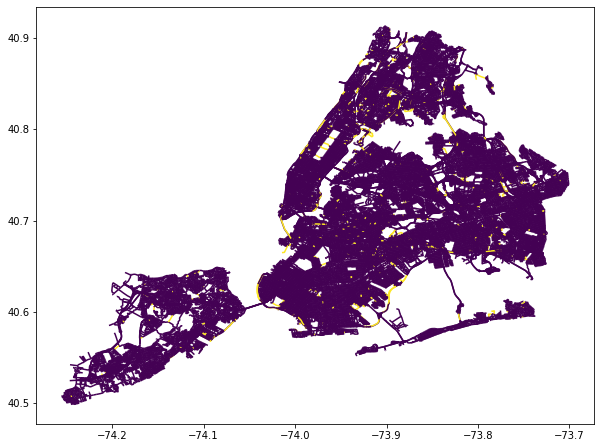

In [39]:
fig, ax = plt.subplots(figsize=(10,10))
segs.plot(column='playsprt', scheme='Quantiles', k=10, ax=ax)

In [40]:
mylist = []
for i, val in enumerate(df.describe().iloc[-1,:]):
    if val==1.0:
         print(df.columns[i]) 

coffshop
recoher
pedactsgn
townhome
spdbump
service
mlgrcer
bldgstry40
softgood
bldgstry1
pedact2
gymfitns
civother
surfpkng
othrrtail
pedcntdwn
kinder
bldgstry48
hotelhos
vermixus
safepple
pedauto
bldgstry812
gasserv
highschl
pedcntdwn2
chainstre
religion
restarnt
financl
pedcrs2
hardgood
sfhatach
trcmpark
offices
scndschl
condoapt
schother
buffpkcr
bikeshre
bldgstry1339
mdhvind
comctlib
bikelane
farnermk
barsclub
pubcivic
movieth
cardeal
liquorst
artgllry
shopmall
pedauto2
bldgstry23
othrsdwk
medicine
primschl
college
restaurant
mustheat
median
bikeretl
cornerst
culdesac
pedcrssgn
libbkstr


In [43]:
segs.columns

Index(['access', 'bridge', 'from', 'highway', 'junction', 'key', 'lanes',
       'length', 'maxspeed', 'name',
       ...
       'bikeretl', 'cornerst', 'vehlanes', 'prmntbldgh', 'culdesac',
       'busstops', 'abndbldg', 'pedcrssgn', 'benches', 'libbkstr'],
      dtype='object', length=118)